# Models

## Model 1: Generalized growth models

Let $C : [0,T] \to [0, \infty)$ is the total confirmed COVID 19 cases at time $t$ and is given by

\begin{align}
C(t) = \left( \frac{r}{m}t + (C_0)^{1/m} \right)^m, \label{eq:model1} \tag{2}
\end{align}

where $m = 1/(1 - p)$ and $C_0 = C(0)$ is the initial condition. Special cases:

- When $p=0$, $C = C_0 + rt$

- When $p=1$, $C = C_o\exp[rt]$


## Model 2: Initially increasing and then decreasing

Consider $C$ given by

\begin{align}
C(t) = at \exp[-bt^2]) + C_0, \label{eq:model2} \tag{3}
\end{align}

where $a\geq 0$ controls the slope of $C$ at origin while $b\geq 0$ controls the inflection point of $C$.

# Plot models

## Model 1

In [1]:
# dependencies
import os
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import seaborn as sns
import copy
import pandas as pd

# sns.set()
# # sns.set_style("dark")
# sns.set_style("whitegrid")
# sns.set_context("paper", font_scale=4, rc={"lines.linewidth": 4})
# # mpl.rcParams['lines.linewidth'] = 3

In [2]:
time = [float(i) for i in range(84)]
C_0 = 1.

def model1(t, theta):
    
    r = theta[0]
    p = theta[1]
    
    m = 0.
    cm = 0.
    if p < 1. - 1.e-5:
        m = 1. / (1. - p)
        cm = np.power(C_0, 1./m)
    C = []
    for i in range(len(t)):
        if p < 1.e-5:
            C.append(r * t[i] + C_0)
        elif p > 1. - 1.e-5:
            C.append(C_0 * np.exp(r * t[i]))
        else:
            C.append(np.power(r * t[i] / m + cm, m))
            
    return np.array(C)

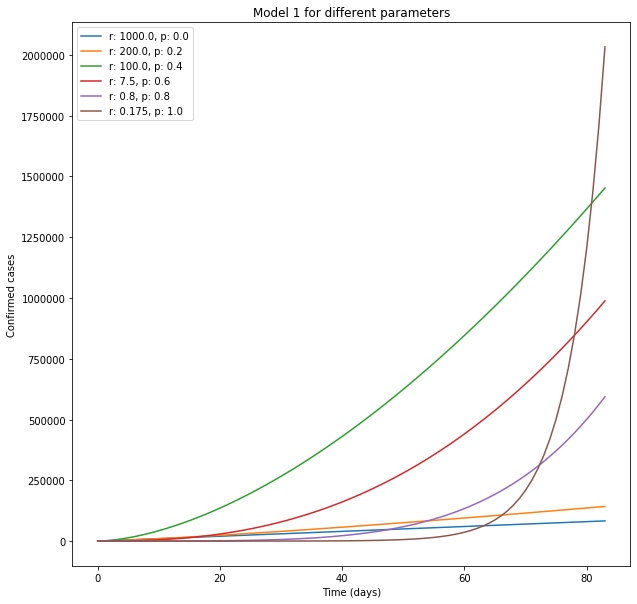

In [3]:
theta_1 = [1000., 200., 100., 7.5, 0.8, 0.175]
theta_2 = [0., 0.2, 0.4, 0.6, 0.8, 1.]

fig = plt.figure(figsize=(10., 10.))
for i in range(len(theta_1)):
    
    r = theta_1[i]
    p = theta_2[i]
    
    C = model1(time, [r,p])
    plt.plot(time, C, label='r: {}, p: {}'.format(r, p))
    
plt.title('Model 1 for different parameters')
plt.xlabel('Time (days)')
plt.ylabel('Confirmed cases')
plt.legend()

## Model 2

In [4]:
def model2(t, theta):
    
    a = theta[0]
    b = theta[1]
    
    C = []
    for i in range(len(t)):
        C.append(a * t[i] * np.exp(-b * t[i] * t[i]) + C_0)
            
    return np.array(C)

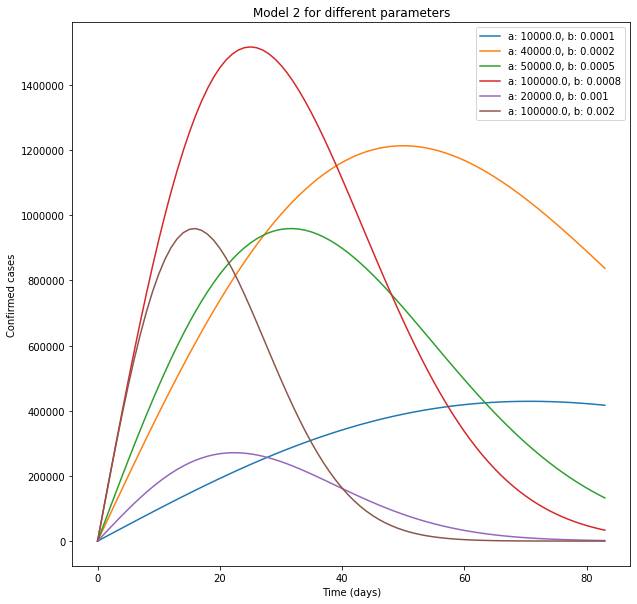

In [5]:
theta_3 = [10000., 40000., 50000., 100000., 20000., 100000.]
theta_4 = [0.0001, 0.0002, 0.0005, 0.0008, 0.001, 0.002]

fig = plt.figure(figsize=(10., 10.))
for i in range(len(theta_1)):
    
    a = theta_3[i]
    b = theta_4[i]
    
    C = model2(time, [a,b])
    plt.plot(time, C, label='a: {}, b: {}'.format(a, b))
    
plt.title('Model 2 for different parameters')
plt.xlabel('Time (days)')
plt.ylabel('Confirmed cases')
plt.legend()

# References

- **Viboud et al 2015** Viboud, C., Simonsen, L. and Chowell, G., 2016. A generalized-growth model to characterize the early ascending phase of infectious disease outbreaks. Epidemics, 15, pp.27-37.